# Inferenza statistica sul modello di Blume Capel

Importo i file .c

In [1]:
!sudo apt-get install libgsl-dev 
!sudo apt-get install bc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,998 kB of archives.
After this operation, 9,931 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libgslcblas0 amd64 2.5+dfsg-6build1 [84.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libgsl23 amd64 2.5+dfsg-6build1 [850 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libgsl-dev amd64 2.5+dfsg-6build1 [1,064 kB]
Fetched 1,998 kB in 4s (455 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /us

In [2]:
!wget https://raw.githubusercontent.com/bsfn1844815/mf_inference/main/blumecapel/blumecapel.c
!wget https://raw.githubusercontent.com/bsfn1844815/mf_inference/main/blumecapel/bc_inf.c
!wget https://raw.githubusercontent.com/bsfn1844815/mf_inference/main/blumecapel/run.sh

--2023-05-17 15:20:19--  https://raw.githubusercontent.com/bsfn1844815/mf_inference/main/blumecapel/blumecapel.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8347 (8.2K) [text/plain]
Saving to: ‘blumecapel.c’

blumecapel.c        100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-05-17 15:20:19 (46.2 MB/s) - ‘blumecapel.c’ saved [8347/8347]

--2023-05-17 15:20:20--  https://raw.githubusercontent.com/bsfn1844815/mf_inference/main/blumecapel/bc_inf.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4434 (4.3K) [text

A questo punto si hanno tre file. blumecapel.c genera i dati con una simulazione Monte Carlo, bc_inf.c prende in output i file generati e tenta un'inferenza sulla matrice di interazione.

Il file blumecapel.c e run.sh possono essere modificati per effettuare simulazioni con diverse configurazioni.


1.   Facendo doppio click sul file blumecapel.c, si possono modificare i #define per passare da una simulazione su reticolo a una su grafo random.
2.   Il file run.sh contiene i comandi per far partire le simulazioni. Una volta aperto basta seguire la sintassi indicata per poter cambiare i parametri del sistema.
3. Per avere delle simulazioni in tempi ragionevoli non superare L = 12. In genere 20~40  punti sono sufficienti per ottenere un buon grafico per l'errore sulla matrice di interazione.



Prima proviamo una simulazione su reticolo con:
L = 8
mu = 1.0
Tmin = 1.0
Tmax = 2.0

In [31]:
!bash run.sh

L = 8, J = 1.0, mu = 1.0, Tmin = 0.75, Tmax=1.750, p = 0.0325,nMeas = 40, MCS = 100000

Runtime = 1.3109 [s]
-------------------0----------------------

Runtime = 1.2883 [s]
-------------------1----------------------

Runtime = 1.2624 [s]
-------------------2----------------------

Runtime = 1.2671 [s]
-------------------3----------------------

Runtime = 2.0876 [s]
-------------------4----------------------

Runtime = 2.8902 [s]
-------------------5----------------------

Runtime = 1.5186 [s]
-------------------6----------------------

Runtime = 1.5316 [s]
-------------------7----------------------

Runtime = 1.6791 [s]
-------------------8----------------------

Runtime = 2.4163 [s]
-------------------9----------------------

Runtime = 2.0018 [s]
-------------------10----------------------

Runtime = 1.9715 [s]
-------------------11----------------------

Runtime = 1.6503 [s]
-------------------12----------------------

Runtime = 1.3278 [s]
-------------------13----------------------

Iniziamo ora a vedere i risultati

Importo una configurazione e l'output del programma di inferenza.

In [32]:
J0 = np.fromfile("/content/outputs/bcJ0.bin",dtype="double")
J = np.fromfile("/content/outputs/bcJ_n16.bin",dtype="double")

Vediamo come sono fatte

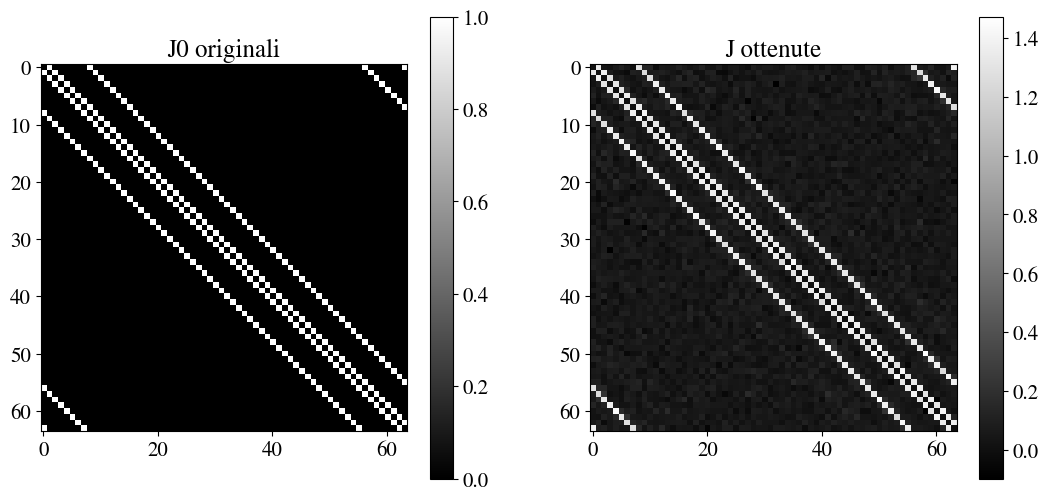

In [33]:
L = 8
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
plt.title("J0 originali")
plt.imshow(J0.reshape(L**2,L**2),cmap = "gist_gray")
plt.colorbar()
plt.subplot(1,2,2)
plt.title("J ottenute")
plt.imshow(-J.reshape(L**2,L**2),cmap = "gist_gray")
plt.colorbar()

Come si può osservare, le J ottenute dall'inferenza sembrano riprodurre correttamente le interazioni originali. Ora proviamo a quantificare l'errore di ricostruzione.

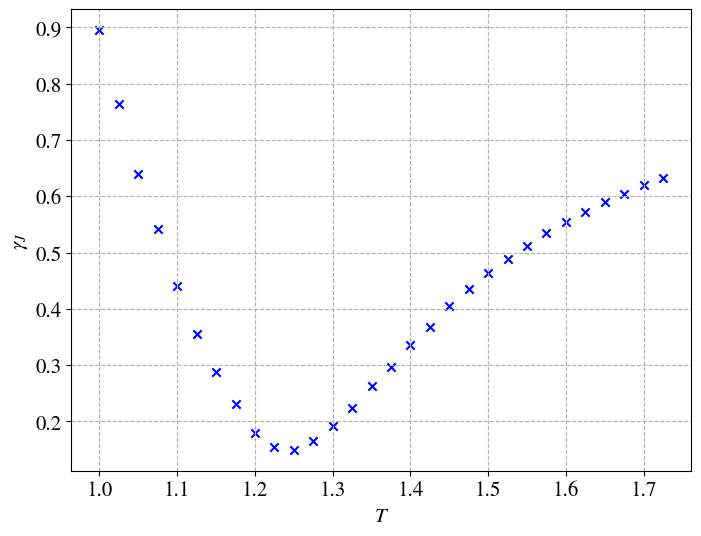

In [34]:
gamma = np.loadtxt("/content/outputs/bcGamma.txt")
plt.figure(figsize = (8,6))
table = gamma[:,1]<=1
plt.scatter(gamma[table,0],gamma[table,1],color="blue",marker = "x")
plt.xlabel("$T$")
plt.ylabel("$\gamma_J$")
plt.grid("both",linestyle = "--")

Vediamo ora cosa succede per un grafo random con gli stessi parametri di simulazione, con p = 2/N. (Modificare il .c)

In [20]:
!bash run.sh

L = 8, J = 1.0, mu = 0.25, Tmin = 0.75, Tmax=2.25, p = 0.0325,nMeas = 30, MCS = 100000

Runtime = 1.7750 [s]
-------------------0----------------------

Runtime = 1.7116 [s]
-------------------1----------------------

Runtime = 1.3319 [s]
-------------------2----------------------

Runtime = 1.3194 [s]
-------------------3----------------------

Runtime = 1.3464 [s]
-------------------4----------------------

Runtime = 1.3491 [s]
-------------------5----------------------

Runtime = 1.3462 [s]
-------------------6----------------------

Runtime = 1.3493 [s]
-------------------7----------------------

Runtime = 1.5311 [s]
-------------------8----------------------

Runtime = 1.8906 [s]
-------------------9----------------------

Runtime = 1.4599 [s]
-------------------10----------------------

Runtime = 1.3901 [s]
-------------------11----------------------

Runtime = 1.3905 [s]
-------------------12----------------------

Runtime = 1.3699 [s]
-------------------13----------------------

Ripetiamo quanto fatto prima

In [28]:
J0 = np.fromfile("/content/outputs/bcJ0.bin",dtype="double")
J=np.fromfile("/content/outputs/bcJ_n10.bin",dtype="double")

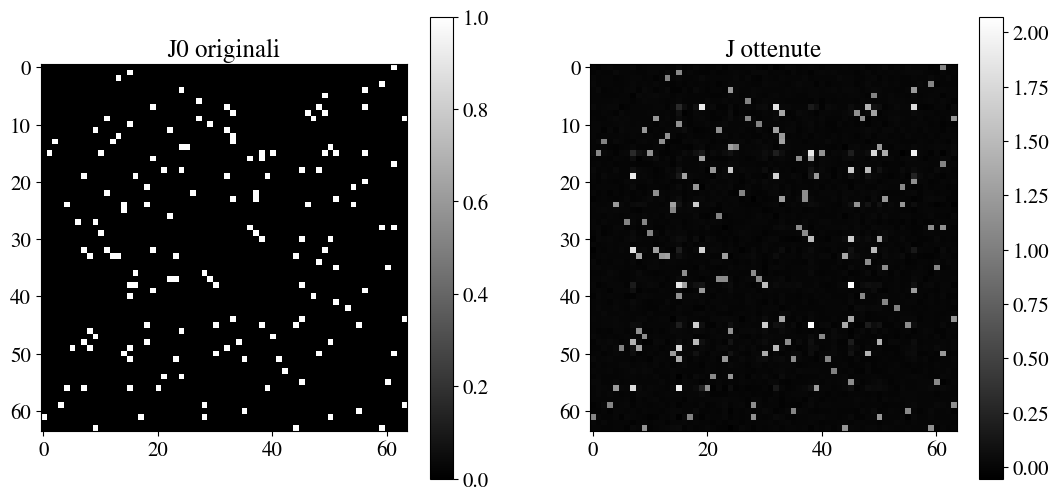

In [29]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
plt.title("J0 originali")
plt.imshow(J0.reshape(L**2,L**2),cmap = "gist_gray")
plt.colorbar()
plt.subplot(1,2,2)
plt.title("J ottenute")
plt.imshow(-J.reshape(L**2,L**2),cmap = "gist_gray")
plt.colorbar()

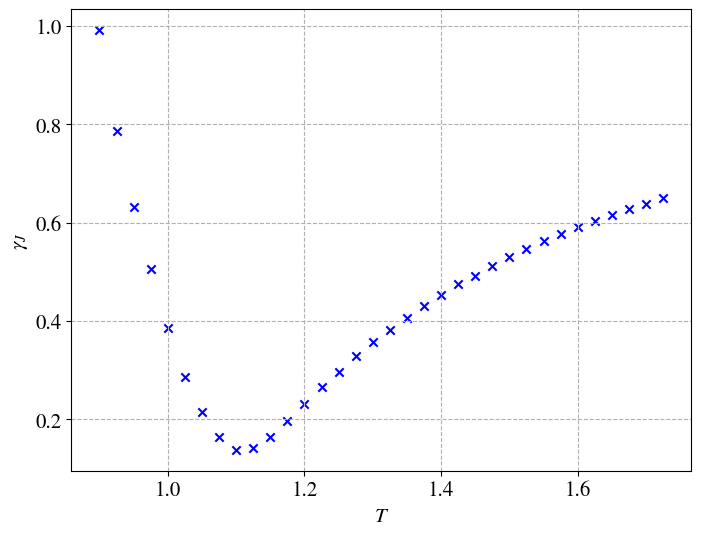

In [30]:
gamma = np.loadtxt("/content/outputs/bcGamma.txt")
plt.figure(figsize = (8,6))
table = gamma[:,1]<=1
plt.scatter(gamma[table,0],gamma[table,1],color="blue",marker = "x")
plt.xlabel("$T$")
plt.ylabel("$\gamma_J$")
plt.grid("both",linestyle = "--")